### Задание 6 История развития искусственного интеллекта 2019/05/07

Используйте любой инструмент для дата майнинга (можно даже ту же самую электронную таблицу).

Найдите закономерности в представленном временном ряду, если они есть.

Сделайте прогноз по тренду.

Напишите краткий отчёт об исследовании и пришлите преподавателю ссылку на него.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_excel('ДРВ. ИИ для GB. Курс 1. Тема 6. Задание на практическое занятие.xlsx')

In [121]:
df.head()

,Дата,Значение
0,2014-05-01,0
1,2014-05-02,10
2,2014-05-03,0
3,2014-05-04,0
4,2014-05-05,0


переведу дату в индекс для удобства

In [122]:
df.index = pd.to_datetime(df.Дата)
df.drop('Дата', axis=1, inplace=True)
df.head()

,Значение
Дата,
2014-05-01,0
2014-05-02,10
2014-05-03,0
2014-05-04,0
2014-05-05,0


In [123]:
df.iloc[1455:,0]

Дата
2018-04-25    8
2018-04-26    1
2018-04-27    2
2018-04-28    1
2018-04-29    1
2018-04-30    2
Name: Значение, dtype: int64

In [124]:
df.describe()

,Значение
count,1461.000000
mean,2.619439
std,2.624230
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,10.000000


Из общего описания, можно определить, что это некоторое описание временного ряда, размер шага составляет 1 день. Всего в датасете 1461 значения, раброс от 0 до 10, при этом половина значений составляют менее 1.

Визуализируем ряд:

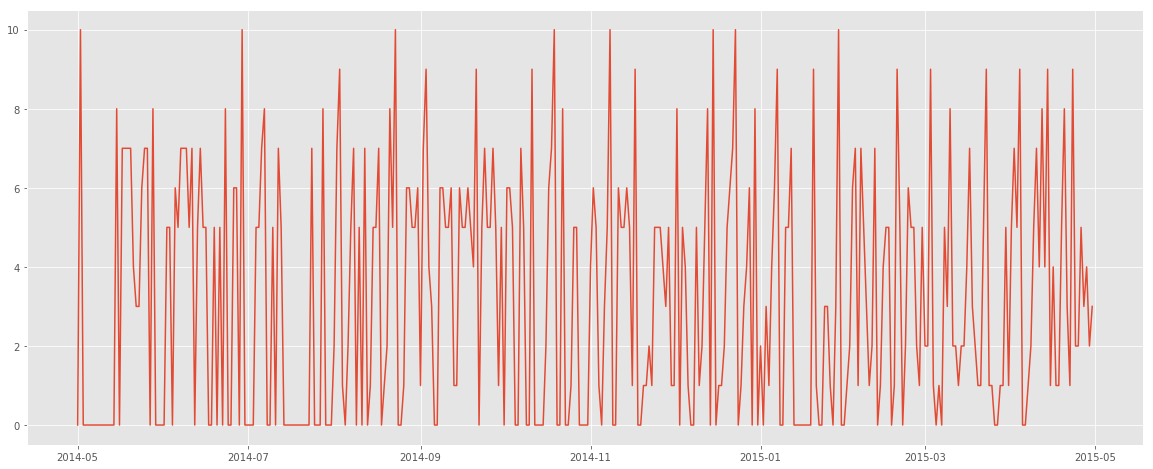

In [125]:
plt.figure(figsize=(20,8))
plt.plot(df.Значение[0:365])
plt.show()

визуально сложно что то выделить на масштабе в 1 день, повышу уровень дискретизации до недели и месяца на базе среднего:

In [126]:
df.resample('M').mean().head()

,Значение
Дата,
2014-05-31,2.709677
2014-06-30,3.866667
2014-07-31,1.838710
2014-08-31,3.806452
2014-09-30,4.466667


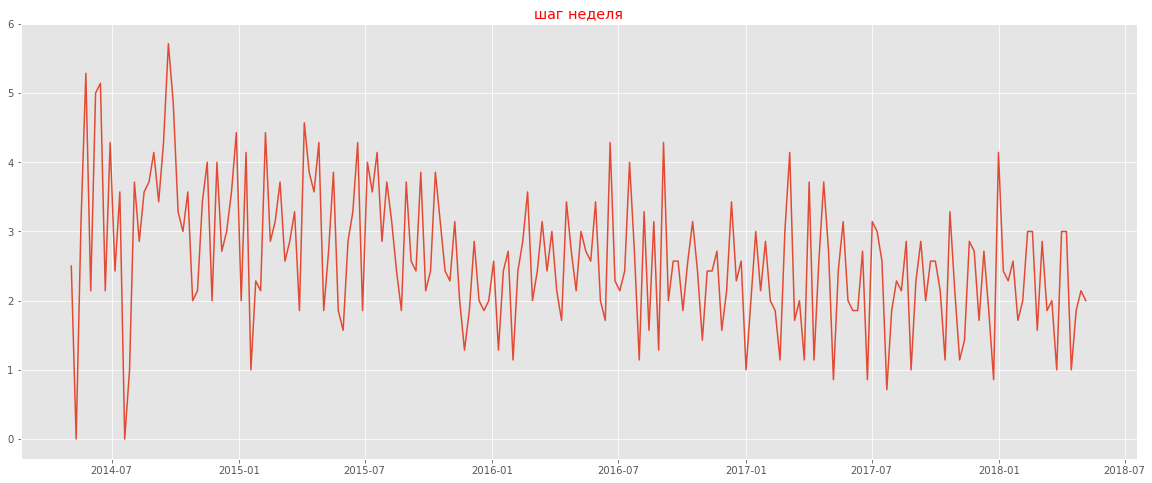

In [127]:
plt.figure(figsize=(20,8))
plt.plot(df.resample('W').mean())
plt.title('шаг неделя', color='r')
plt.show()

на недельном графике можно увидеть только некоторое уменьшение вариации

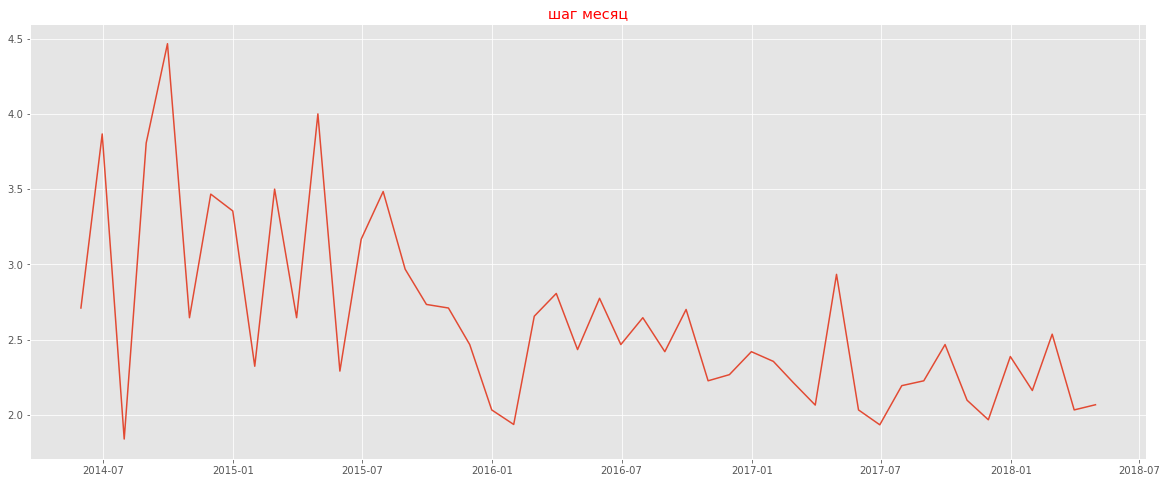

In [128]:
plt.figure(figsize=(20,8))
plt.plot(df.resample('M').mean())
plt.title('шаг месяц', color='r')
plt.show()

на этом шаге можно наблюдать уже нисходящий тренд

проверю на возможную сезонность в данных:

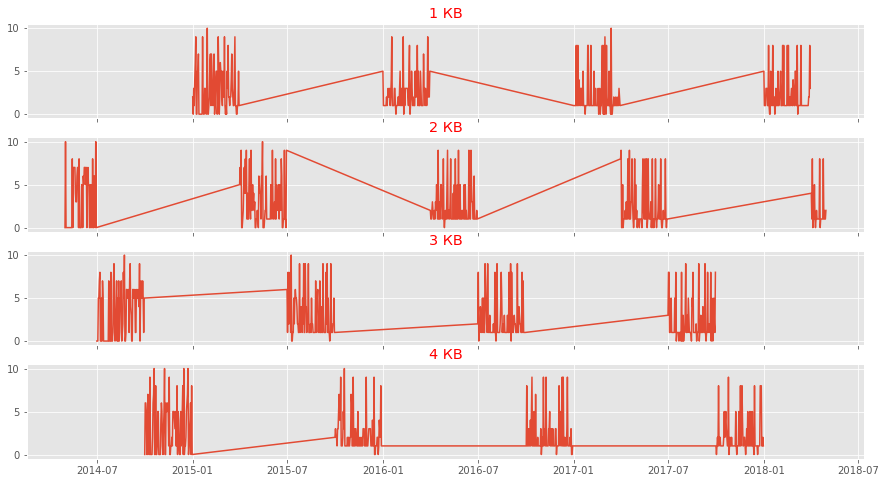

In [129]:
f, axes = plt.subplots(4, sharex=True, sharey=False, figsize=(15,8))

axes[0].plot(df[(df.index.quarter == 1)])
axes[0].set_title('1 КВ', color='red')
axes[1].plot(df[(df.index.quarter == 2)])
axes[1].set_title('2 КВ', color='red')
axes[2].plot(df[(df.index.quarter == 3)])
axes[2].set_title('3 КВ', color='red')
axes[3].plot(df[(df.index.quarter == 4)])
axes[3].set_title('4 КВ', color='red')
plt.show()

визуально зависимости по сезонам не отражаются

явно высокий уровень шума, поэтому снизим его через применение скользящей средней:

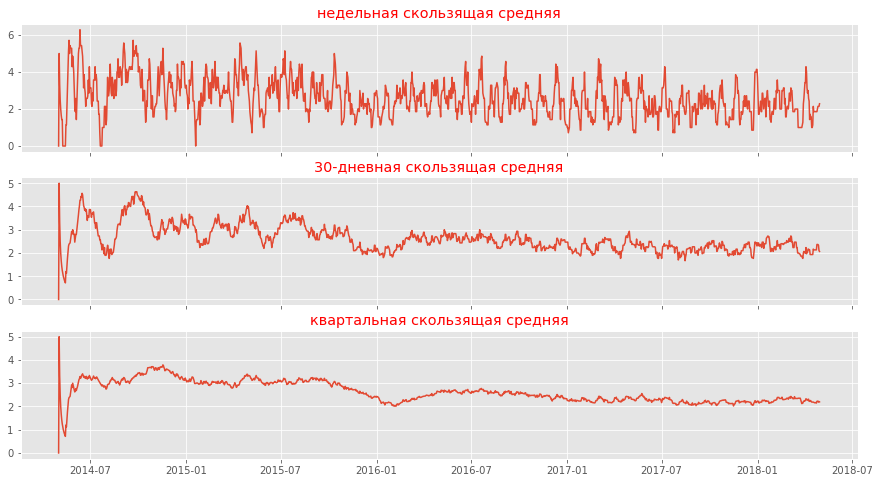

In [130]:
f, axes = plt.subplots(3, sharex=True, sharey=False, figsize=(15,8))

axes[0].plot(df.rolling(7, min_periods=1).mean())
axes[0].set_title('недельная скользящая средняя', color='red')
axes[1].plot(df.rolling(30, min_periods=1).mean())
axes[1].set_title('30-дневная скользящая средняя', color='red')
axes[2].plot(df.rolling(90, min_periods=1).mean())
axes[2].set_title('квартальная скользящая средняя', color='red')
plt.show()

а вот теперь отчетливо виден стагнирующий тренд. что касается прогноза - визуально я бы определил колебания значений в том же корридоре. если бы это были стоимости финансовых, то я бы предположил возможный резкий дроп вниз. в ином случае - продолжение тренда. 